In [ ]:
!pip gpyopt install pydoe sobol_seq
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy
from GPyOpt.experiment_design import initial_design
from GPyOpt.methods import BayesianOptimization

%pylab inline 
%matplotlib inline

ERROR: unknown command "gpyopt"
Populating the interactive namespace from numpy and matplotlib


[[ 3.51203194  0.15443965]
 [ 2.33828362 -0.05217681]
 [-0.0785064   0.7142788 ]
 [ 4.11922078  0.3592275 ]
 [ 0.63864644 -0.81513554]
 [-0.69338397  0.28198136]
 [-2.25202823  0.16506238]
 [ 3.78669757  0.25827253]
 [-2.58122842 -0.48280072]
 [-4.22380215 -0.99971015]]


Text(0.5, 1.0, 'Grid design')

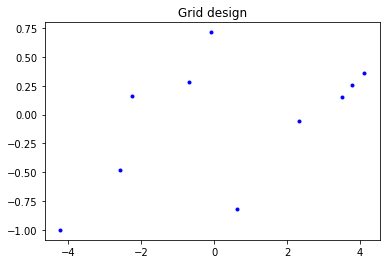

In [ ]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=2) 

mixed_domain =[{'name': 'var1_2', 'type': 'continuous', 'domain': (-5,5),'dimensionality': 1},
               {'name': 'var5', 'type': 'continuous', 'domain': (-1,1)}]

space = GPyOpt.Design_space(mixed_domain)
data_init = 10

### --- Grid design
X = initial_design('random',space,data_init)
print(X)
plt.plot(X[:,0],X[:,1],'b.')
plt.title('Grid design')

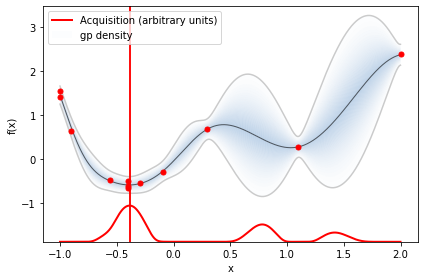

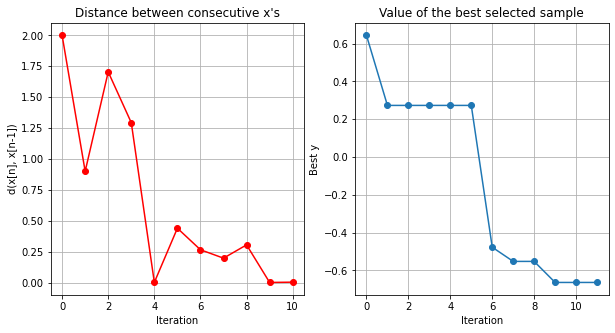

In [53]:

bounds = np.array([[-1.0, 2.0]])
noise = 0.2

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

X_init = np.array([[-0.9], [1.1]])
Y_init = f(X_init)

bds = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)

optimizer = BayesianOptimization(f=f, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.01,
                                 X=X_init,
                                 Y=-Y_init,
                                 noise_var = noise**2,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=True)


optimizer.run_optimization(max_iter=10)
optimizer.plot_acquisition()
optimizer.plot_convergence()

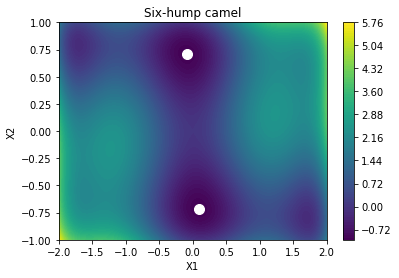

In [54]:
# 2-dimensional example
f_true = GPyOpt.fmodels.experiments2d.sixhumpcamel()
f_sim = GPyOpt.fmodels.experiments2d.sixhumpcamel(sd=0.1)
f_true.plot()
bounds = f_true.bounds

# bayesopt package

In [3]:
# !pip install Bayesian-Optimization
from bayes_opt import BayesianOptimization

def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(
    init_points=2,  # number of initial points
    n_iter=3,       # num candidates
)

# print max 
print(optimizer.max)

# print optimized results
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))
    
# update x bounds
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(init_points=0,
                   n_iter=5,
)


# evaluate on this point
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)
optimizer.maximize(init_points=0, 
                   n_iter=0)



|   iter    |  target   |     x     |     y     |
-------------------------------------------------
[maximize] x_probe: [2.83404401 1.32194696]
|  1        | -7.135    |  2.834    |  1.322    |
[maximize] x_probe: [ 2.00022875 -1.18600456]
|  2        | -7.78     |  2.0      | -1.186    |
[maximize] x_probe: {'x': 2.2175526295255183, 'y': -0.7867249801593896}
|  3        | -7.11     |  2.218    | -0.7867   |
[maximize] x_probe: {'x': 3.660003815774634, 'y': 0.9608275029525108}
|  4        | -12.4     |  3.66     |  0.9608   |
[maximize] x_probe: {'x': 2.2303920156083024, 'y': -0.7392021938893159}
|  5        | -6.999    |  2.23     | -0.7392   |
{'target': -6.999472814518675, 'params': {'x': 2.2303920156083024, 'y': -0.7392021938893159}}
Iteration 0: 
	{'target': -7.135455292718879, 'params': {'x': 2.8340440094051482, 'y': 1.3219469606529488}}
Iteration 1: 
	{'target': -7.779531005607566, 'params': {'x': 2.0002287496346898, 'y': -1.1860045642089614}}
Iteration 2: 
	{'target': -7.109925